# Generating the final plots

In [33]:
## Branin (avg across 10)
space = {
    'x1': uniform(-20, 40),
    'x2': uniform(-30, 60),
}
def branin(x1, x2):
    a = 1.
    b = 5.1 / (4.*np.pi**2)
    c = 5. / np.pi
    r = 6.
    s = 10.
    t = 1. / (8.*np.pi)
    ret = a*(x2-b*x1**2+c*x1-r)**2+s*(1-t)*np.cos(x1)+s
    return ret

In [75]:
y_random = [-47.36196093390153, -14.269020738575284, -9.51494289625832, -5.774935748504457, -2.9004249777910753, -0.9262187104256702, -0.8769296760193639, -0.6357546742535947, -0.5696661313514377, -0.5612358300890392]
y_mango_serial = [-55.46493638715067, -16.39599785240814, -8.392903381355834, -3.06530629224604, -1.9695600581600576, -1.4698796100272002, -0.8072005941411551, -0.5917437824972076, -0.5211043072326971, -0.49977156020267816]
# clustering
y_mango_parallel = [-1.2417719546883021, -0.6725600662987568, -0.4920589042375306, -0.47715586687435946, -0.47715586687435946, -0.4675481585413571, -0.4571140978517946, -0.44322307239829933, -0.4257734895050742, -0.4219551480294344]
# no clustering
y_mango_parallel = [-2.338522326988591, -0.8454136490495555, -0.5804597911925159, -0.5236540687142706, -0.4942458860367365, -0.47516736372809343, -0.45070757257838834, -0.44966712081887544, -0.44966712081887544, -0.44966712081887544]
y_hyperopt_serial = [-13.907603029611987, -8.228795479753604, -6.194908293884497, -5.0858171234810365, -4.370067462739509, -3.652695342141284, -3.236953148369777, -3.00861447335551, -3.0049221493683684, -2.606532365508534]
y_hyperopt_parallel = [-5.99620934543177, -1.6628739426900598, -1.2336359305897047, -1.049369531119014, -1.004460213988847, -0.7152236116501726, -0.6624153335249149, -0.6111490143674875, -0.5967390182349156, -0.5792297897909119]


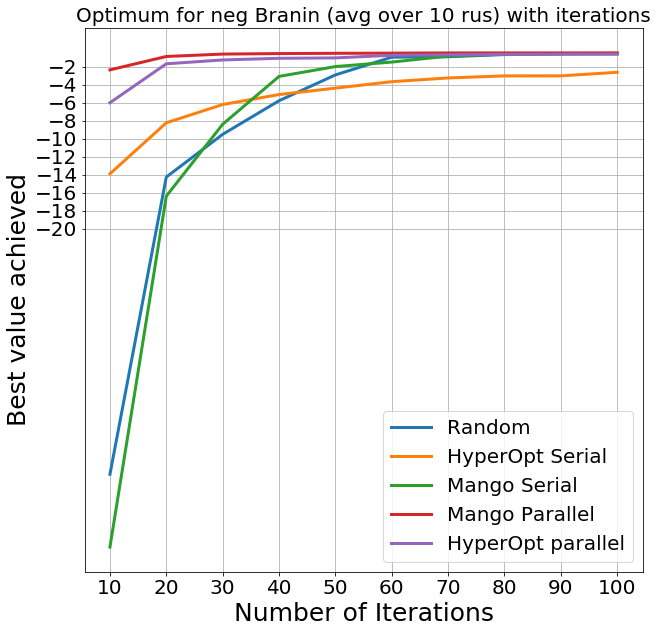

In [77]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))

plotting_itr =[10,20,30,40,50,60,70,80,90,100]
plt.plot(plotting_itr,y_random,label = 'Random',linewidth=3.0) #x, y
plt.plot(plotting_itr,y_hyperopt_serial,label = 'HyperOpt Serial',linewidth=3.0) #x, y
plt.plot(plotting_itr,y_mango_serial,label = 'Mango Serial',linewidth=3.0) #x, y
plt.plot(plotting_itr,y_mango_parallel,label = 'Mango Parallel',linewidth=3.0) #x, y
plt.plot(plotting_itr,y_hyperopt_parallel,label = 'HyperOpt parallel',linewidth=3.0) #x, y

plt.xlabel('Number of Iterations',fontsize=25)
plt.ylabel('Best value achieved',fontsize=25)
plt.title('Optimum for neg Branin (avg over 10 rus) with iterations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.yticks(np.arange(-20, 0, step=2))
plt.xticks(np.arange(10, 110, step=10))
plt.legend(fontsize=20)
plt.show()

In [78]:
## Branin Categorical avg 10 runs
space = {
    'x1': uniform(0, 1),
    'x2': uniform(0, 1),
    'x3': ['a', 'b', 'c']
}
# ref: https://pdfs.semanticscholar.org/5284/110bd42233ef08334ca3567c54ff9e01cc3f.pdf
# x = (0.9616520, 0.15),(0.1238946, 0.8166644) and (0.5427730, 0.15) with fopt =
# 0.397887 and has no local optima.
def branin_cat(x1, x2, x3):
    a = 1.
    b = 5.1 / (4.*np.pi**2)
    c = 5. / np.pi
    r = 6.
    s = 10.
    t = 1. / (8.*np.pi)
    x11 = x1*15. - 5
    fb = a*(15.0*x2-b*x11**2+c*x11-r)**2+s*(1-t)*np.cos(x11)+s
    fb_mod = (fb - 54.8104) / 51.9496
    if x3 == 'a':
        ret = fb_mod + 0.2
    elif x3 == 'b':
        ret = fb_mod * 0.5
    elif x3 == 'c':
        ret = 1.03 + x1**2 - 2*x2**2 - math.log(abs(fb_mod)**0.5)
    else:
        raise Exception("x3 not recognized")

    return ret

In [84]:
y_random = [0.6092386490961731, 0.7833512584536446, 0.7967950129539323, 0.8029795091256128, 0.8338136243610921, 0.8489831222774138, 0.8557843152898135, 0.8557843152898135, 0.8706375753243559, 0.8709928540597283]
y_hyperopt_serial = [0.5593992698416694, 0.695885836849492, 0.8310970624264389, 0.8407189945101949, 0.8604458951073191, 0.8641430761255764, 0.8678811066190363, 0.8687584971454363, 0.8882252887137447, 0.8930639823976385]
y_mango_serial = [0.7294838732811355, 0.8581278129340866, 0.8742236778374123, 0.9047458150425655, 0.9099379194064567, 0.9136245648016447, 0.9407054632760777, 0.9594409814545786, 0.9594409814545786, 0.9909458320074579]
#no clustering
y_mango_parallel = [0.9124906073261162, 0.9423075650455036, 0.9612648260278167, 0.99947028281903, 1.000833521865795, 1.0171066815700363, 1.0230520037658926, 1.024179421241858, 1.0281799294310525, 1.029297033417874]
y_hyperopt_parallel = [0.8493477123535144, 0.8636665761044313, 0.9112607885882291, 0.9149510957721512, 0.935695148805552, 0.9363223936664685, 0.946927675888588, 0.946927675888588, 0.9476387283189351, 0.9679130597984582]

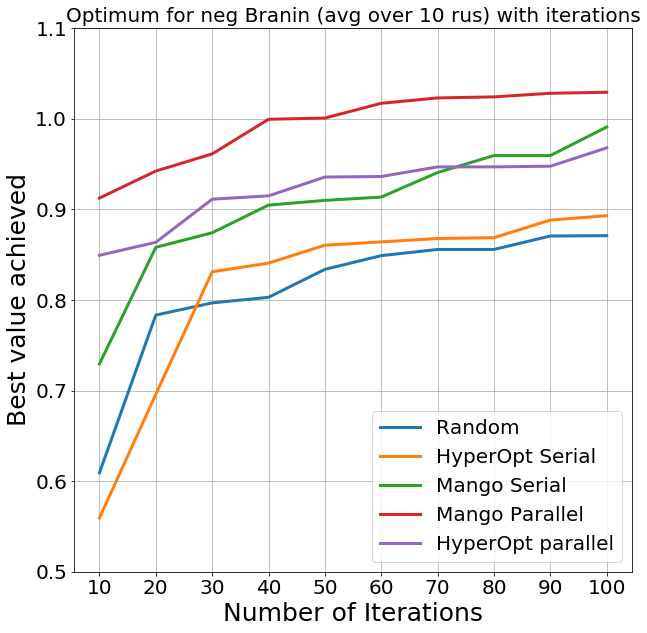

In [85]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))

plotting_itr =[10,20,30,40,50,60,70,80,90,100]
plt.plot(plotting_itr,y_random,label = 'Random',linewidth=3.0) #x, y
plt.plot(plotting_itr,y_hyperopt_serial,label = 'HyperOpt Serial',linewidth=3.0) #x, y
plt.plot(plotting_itr,y_mango_serial,label = 'Mango Serial',linewidth=3.0) #x, y
plt.plot(plotting_itr,y_mango_parallel,label = 'Mango Parallel',linewidth=3.0) #x, y
plt.plot(plotting_itr,y_hyperopt_parallel,label = 'HyperOpt parallel',linewidth=3.0) #x, y

plt.xlabel('Number of Iterations',fontsize=25)
plt.ylabel('Best value achieved',fontsize=25)
plt.title('Optimum for neg Branin (avg over 10 rus) with iterations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.yticks(np.arange(0.5, 1.1, step=0.1))
plt.xticks(np.arange(10, 110, step=10))
plt.legend(fontsize=20)
plt.show()